Assignment No.4
Name : Shivani Gaikwad
Roll No. 43315
Batch : P-11

### 1. Import required libraries 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

### 2. Download and read the dataset

In [3]:
path = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
# last column is target
# 0 = anomaly, 1 = normal

target = 140

features = data.drop(target, axis=1)
target = data[target]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)

train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

### 3. Encoder converts it into latent representation 

### 4. Decoder networks convert it back to the original input

In [5]:
class AutoEncoder(Model):
    
    def __init__(self, output_units, code_size=8):
        super().__init__()
        self.encoder = Sequential([Dense(64, activation='relu'), Dropout(0.1),
                                  Dense(32, activation='relu'), Dropout(0.1),
                                 Dense(16, activation='relu'), Dropout(0.1),
                                 Dense(code_size, activation='relu')])
        self.decoder = Sequential([Dense(16, activation='relu'), Dropout(0.1),
                                  Dense(32, activation='relu'), Dropout(0.1),
                                  Dense(64, activation='relu'), Dropout(0.1),
                                  Dense(output_units, activation='sigmoid')])
        
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

### 5. Compile the models with optimizers, loss and evaluation metrics

In [6]:
model = AutoEncoder(output_units = x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')
history = model.fit(x_train_scaled, x_train_scaled, epochs=100, batch_size=512, validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/100
5/5 [==============================] - 4s 120ms/step - loss: 0.0109 - mse: 0.0245 - val_loss: 0.0128 - val_mse: 0.0297
Epoch 2/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0104 - mse: 0.0232 - val_loss: 0.0125 - val_mse: 0.0290
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0094 - mse: 0.0211 - val_loss: 0.0123 - val_mse: 0.0285
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0084 - mse: 0.0189 - val_loss: 0.0116 - val_mse: 0.0268
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0075 - mse: 0.0167 - val_loss: 0.0109 - val_mse: 0.0252
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0066 - mse: 0.0148 - val_loss: 0.0102 - val_mse: 0.0237
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0059 - mse: 0.0132 - val_loss: 0.0097 - val_mse: 0.0226
Epoch 8/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0055 - mse: 0.0

In [7]:
import matplotlib.pyplot as plt

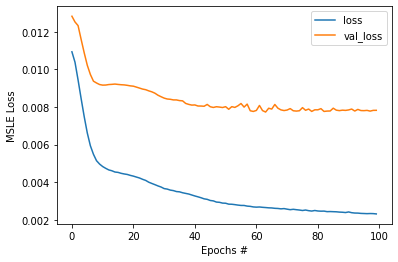

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs #')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()